In [24]:
import sys
import numpy as np
print('Python: {}'.format(sys.version))
print ('Numpy: {}'.format(np.__version__))

Python: 3.9.0 (default, Sep  7 2024, 08:23:43) 
[GCC 11.4.0]
Numpy: 2.0.2


In [25]:
from numpy import linalg

In [26]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [27]:
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [28]:
# Euclidean (L2) norm - default

print(np.linalg.norm(A)) 
print(np.linalg.norm(B)) 

8.306623862918075
8.306623862918075


In [29]:
# the Frogenius norm is the L2 nor, for a matrix
print(np.linalg.norm(B,'fro')) 

8.306623862918075


In [61]:
# the max norm (P = infinity)
print(np.linalg.norm(A,np.inf)) 
print(np.linalg.norm(B,np.inf)) 

3.0
12.0


In [62]:
# vector normalization -  normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A/ norm
A_unit

array([[0.26726124, 0.        , 0.        ],
       [0.        , 0.53452248, 0.        ],
       [0.        , 0.        , 0.80178373]])

In [63]:
# the maginitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

np.float64(1.0)

In [64]:
# find the eigenvalues and eigenvectors for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [65]:
eigenvalues, eigenvectors = np.linalg.eig(A)


In [66]:
# returns the eigenvalues for the matrix
eigenvalues

array([1., 2., 3.])

In [67]:
# returns the eigenvectors for the matrix
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [68]:
# the eigenvalues w[i] corresponds to the eigenvector v[:,1]
print('Eigenvalue: {}'.format(eigenvalues[1]))
print('Eigenvector {}'.format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector [0. 1. 0.]


In [69]:
np.diag(eigenvalues)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [70]:
 np.linalg.inv(eigenvectors)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [71]:
# verify eigendecomposition
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
matrix

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [72]:
output = np.matmul(eigenvectors,matrix).astype(int)
output

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [77]:
# import neccesary matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

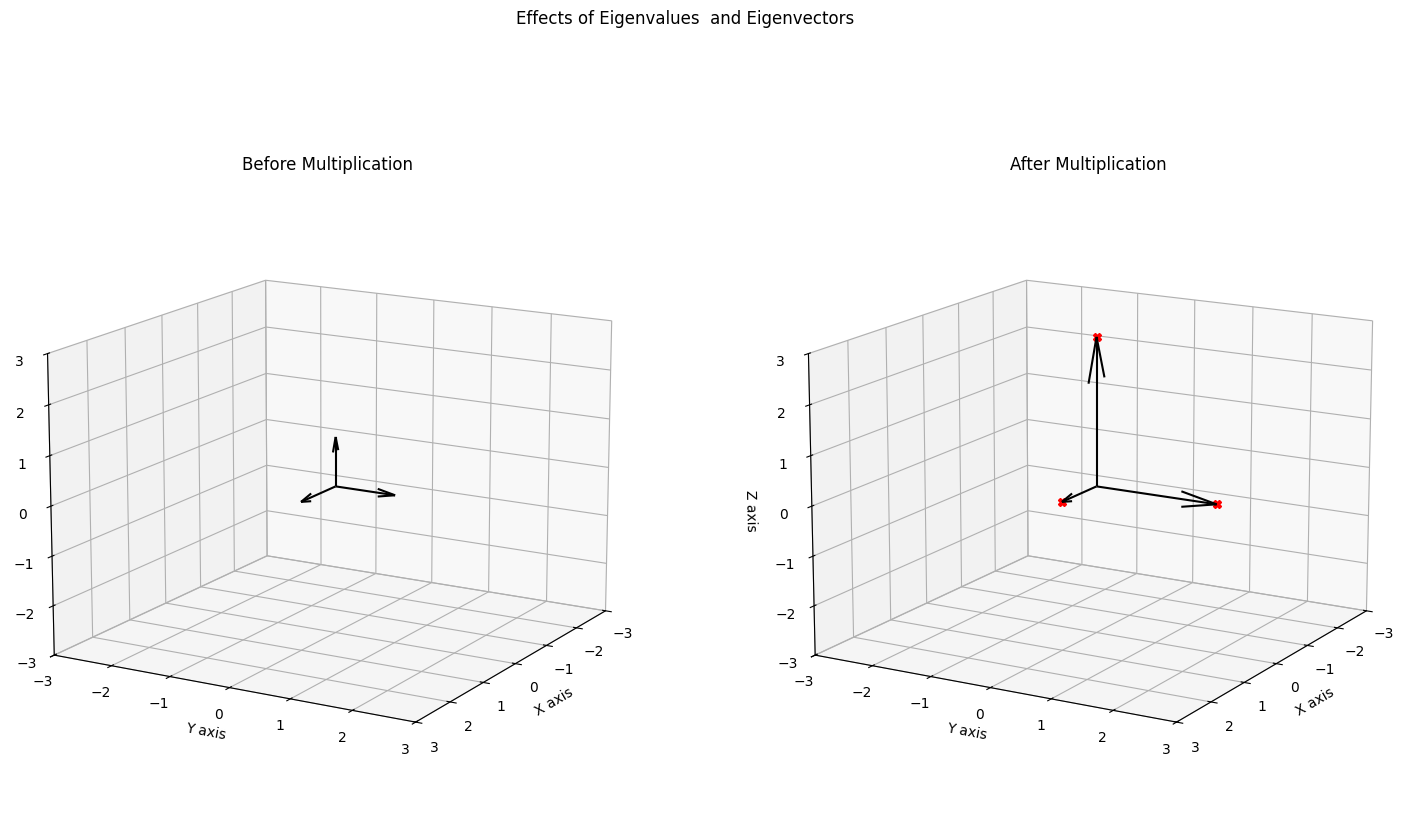

In [80]:
# plot the eigenvectors
origin = [0,0,0,]
fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues  and Eigenvectors')
ax1 = fig.add_subplot(121,projection = '3d')
ax1.quiver(origin,origin,origin,eigenvectors[0,:], eigenvectors[1,:],eigenvectors[2,:], color = 'k')

ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])

ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15,30)
ax1.set_title('Before Multiplication')

# multiply original matrix by eigenvectors
new_eig = np.matmul(A,eigenvectors)
ax2 = plt.subplot(122,projection='3d')

ax2.quiver(origin,origin,origin,new_eig[0,:], new_eig[1,:],new_eig[2,:], color = 'k')

# add the eigenvalues to the plot
ax2.plot((eigenvalues[0]* eigenvectors[0]),(eigenvalues[1]*eigenvectors[1]),(eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])

ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15,30)
ax2.set_title('After Multiplication')


# show the plot
plt.show()